In [1]:
import re
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

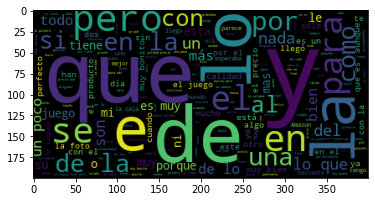

In [3]:
palabras = pd.read_csv("reviews_vidjew_es.csv")
palabras = palabras.review_body.str.cat(sep=" ")
# palabras
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [4]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+"," ", texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords]
    texto = " ".join(texto)
    return(texto)

words = pre_procesado(palabras)

In [5]:
palabras

'Buen. Buena calidad, y buena presentación. Un producto a perfecto, para salir de casa con la Nintendo switch No funciona con Nintendo Switch. No hay forma de emparejarlo para poder jugar. Recomendado, los utilizo para pc y no me dan ningún problema, se oye bien y te oyen bien El cable funciona bien podria ser un poco mas largo pero se adapta perfectamente a la descripcion.envio muy rapido muy recomendado És muy bonito pero la empuñadura de la espada se rompe fácilmente... Lo compré para regalar y repetiré la compra seguro ya que calidad, presentación y precio son estupendas. Sin dudarlo recomendable. Señores: Dos veces he comprado este producto y las dos veces una de las perlas de cada compra me ha venido rota.Por no perder tiempo porque mi señora le gustan mucho vuelvo a pedir otro par y este me viene igual.No quiero hacer ninguna critica adversa a su producto y por eso les envio la foto para que ustedes comprueben.Espero se les ocurra algo para no tener que devolver el producto.Grac

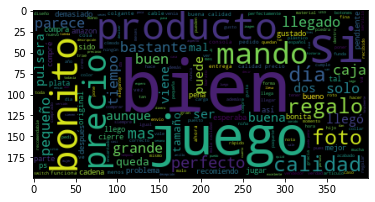

In [6]:
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.show()

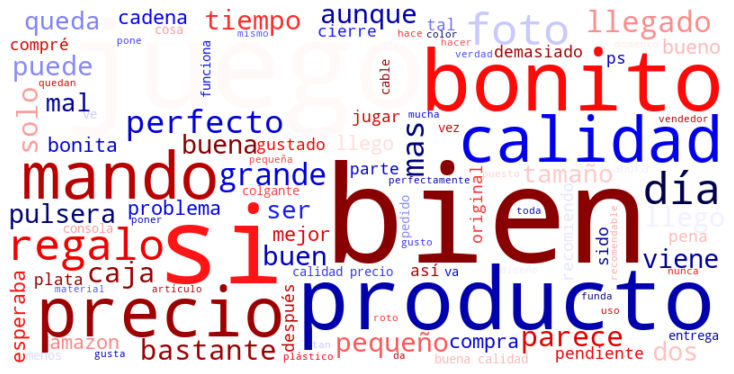

In [7]:
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="seismic_r",
                      stopwords=stopwords, collocations=True).generate(words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

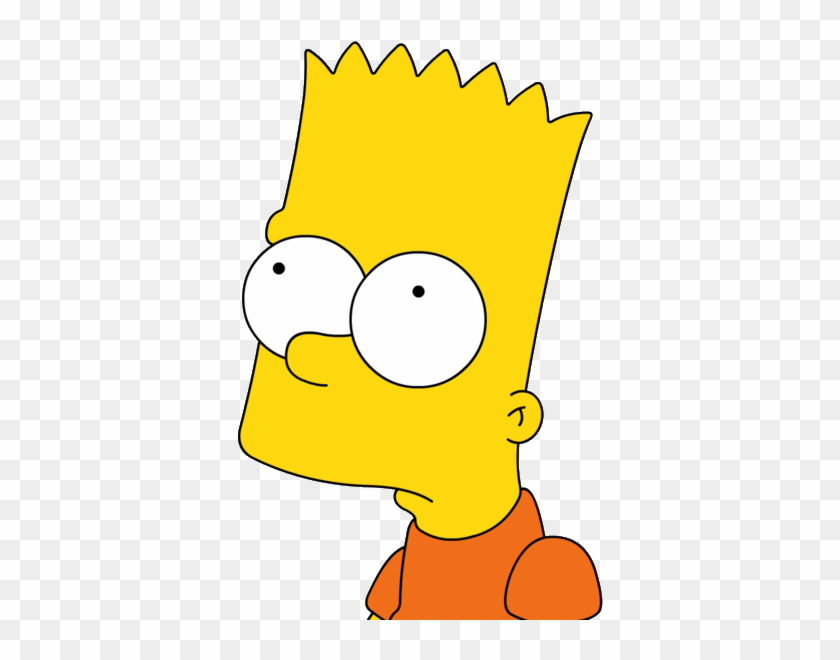

In [25]:
img = PIL.Image.open("test.png")
display(img)

In [26]:
mask = np.array(img)

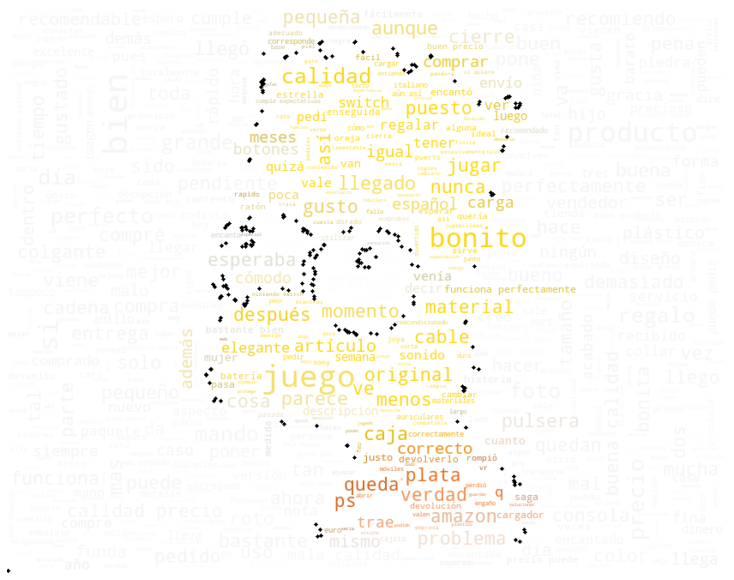

In [31]:
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=40, max_words=700,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=5, contour_color='black').generate(words) 
image_colors=ImageColorGenerator(mask)

wordcloud.to_file("test.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()